In [79]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
%matplotlib inline

Re, Rm, omega0, q, B0, pi, Q, beta, c1, c2, u0, du0, k = symbols("R_e R_m Omega_0 q B_0 pi Q beta c_1 c_2 u_0 du_0 k", real=True)
dt, dr, dz = symbols("d_t d_r d_z")
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

psi = Function('psi')(t,r,z)
u = Function('u')(t,r,z)
A = Function('A')(t,r,z)
B = Function('B')(t,r,z)

#State vector matrix
V = Matrix([psi, u, A, B])


Assume

$\Omega(r) = c_1 + c_2 r^{-2}$

$\partial_r \Omega(r) = -2c_2 r^{-3}$

where $c_2 = r^2_1 r^2_2 (\Omega_1 - \Omega_2)/(r^2_2 - r^2_1)$

Note: rewriting all matrices so that they are defined for the LHS of the equation i.e. LV = 0. Also writing matrices in terms of $u_0 = r \Omega(r) = c_1 r + c_2/r$


In [50]:
L0 = Matrix([[-(1/Re)*((-3/r**4)*dr + (3/r**3)*dr**2 - (2/r**2)*dr**3+(1/r)*dr**4), 0, 0, 0],
            [0, -(1/Re)*(dr**2 + (1/r)*dr - (1/r**2)), 0, 0],
            [0, 0, -(1/Rm)*(dr**2 - (1/r)*dr), 0],
            [0, 0, 0, -(1/Rm)*(dr**2 + (1/r)*dr - (1/r**2))]])

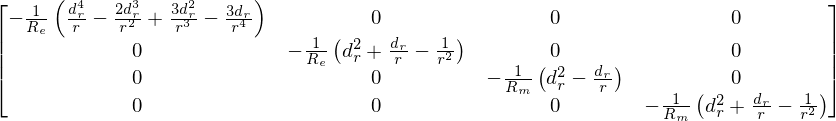

In [51]:
L0

In [53]:
#L1 = Matrix([[0, 3*omega0*r**(-q), (2/beta)*(1/r)*(dr**2 - (1/r)*dr), 0],
#             [-(4/r)*(omega0*r**(-q)) - (-q*omega0*r**(-q-1)), 0, 0, (2/beta)],
#             [1, 0, 0, 0],
#             [0, 1, (2/r)*(omega0*r**(-q)) + (-q*omega0*r**(-q-1)), 0]])

L1 = Matrix([[0, -(2/r)*u0, (2/beta)*((1/r**2)*dr - (1/r)*dr**2), 0],
             [(1/r**2)*u0 + (1/r)*du0, 0, 0, -(2/beta)],
             [-1, 0, 0, 0],
             [0, -1, (1/r**2)*u0 - (1/r)*du0, 0]])

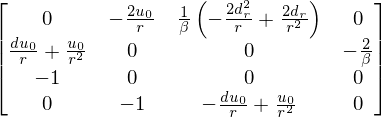

In [54]:
L1

In [55]:
L2 = Matrix([[-(1/Re)*((-2/r**2)*dr + (2/r)*dr**2), 0, 0, 0],
             [0, -1/Re, 0, 0],
             [0, 0, -1/Rm, 0],
             [0, 0, 0, -1/Rm]])

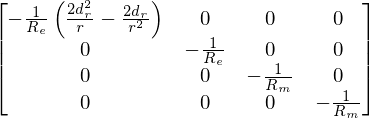

In [56]:
L2

In [57]:
L3 = Matrix([[0, 0, -(2/beta)*(1/r), 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

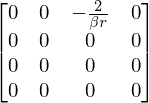

In [58]:
L3

In [59]:
L4 = Matrix([[-(1/Re)*(1/r), 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

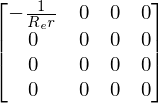

In [60]:
L4

In [62]:
G = Matrix([[0, 0, (2/beta)*((1/r**2)*dr - (1/r)*dr**2), 0],
             [0, 0, 0, -(2/beta)],
             [-1, 0, 0, 0],
             [0, -1, 0, 0]])

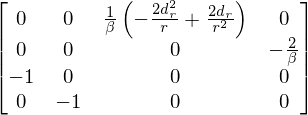

In [63]:
G

In [64]:
L = L0 + L1*dz + L2*dz**2 + L3*dz**3 + L4*dz**4

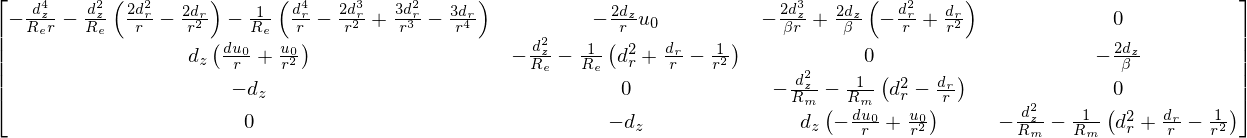

In [65]:
L

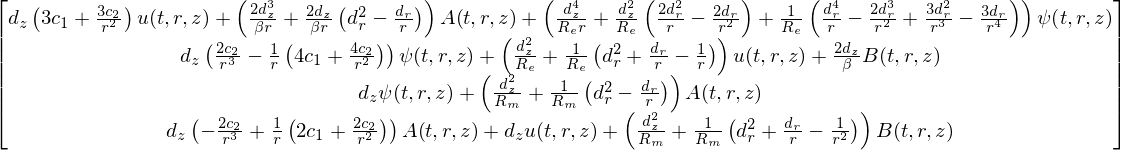

In [16]:
L*V

In [66]:
D = Matrix([[((1/r)*dz**2 + (1/r)*dr**2 - (1/r**2)*dr), 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

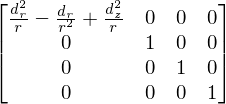

In [67]:
D

In [24]:
Identity_matrix = Matrix([[1, 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

In [25]:
#M = (L - sigma*Identity_matrix).subs(dz, 1j*Q)

In [26]:
#nokr = M.subs(dr, 0)

In [27]:
#nokr.det()

In [68]:
U = Matrix([0, 0, 0, B])

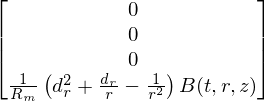

In [69]:
(dt*D*U - L*U).subs(dz, 0).subs(dt, 0)

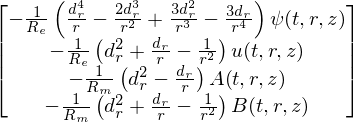

In [70]:
(L*V).subs(dz, 0)

In [71]:
L1twiddle = L1 + 2*L2*dz + 3*L3*dz**2 + 4*L4*dz**3

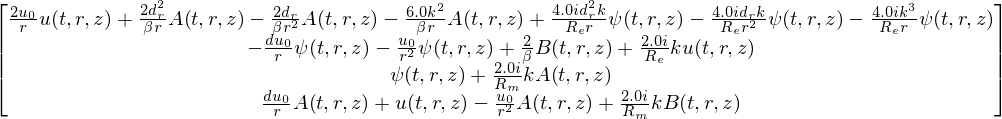

In [80]:
((-L1twiddle*V).subs(dz, 1j*k)).expand()

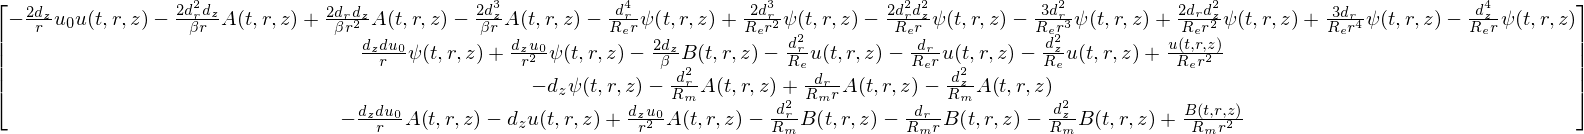

In [87]:
(L*V).expand()